## Build a regression model using Scikit-learn: Preparing a raw datasheet for Pumpkin Market In US

### A .csv file in the root data folder called US-pumpkins.csv which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

> First, check for missing dates
You will first need to take steps to check for missing dates:
* Convert the dates to a month format (these are US dates, so the format is MM/DD/YYYY).
* Extract the month to a new column.

Use the head() function to view the first five rows.

In [1]:
import pandas as pd
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Check if there is missing data in the current dataframe

In [2]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

To make your dataframe easier to work with, drop several of its columns, using drop(), keeping only the columns you need
#### A set of new columns for a new dataframe. Filter out nonmatching columns

In [3]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

Determine average price of pumpkin
Take the average of the Low Price and High Price columns to populate the new Price column, and convert the Date column to only show the month.

In [4]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

month[:10]

Int64Index([4, 5, 9, 9, 11, 11, 9, 9, 10, 10], dtype='int64', name='Date')

### Now, copy your converted data into a fresh Pandas dataframe:
Printing out your dataframe will show you a clean, tidy dataset on which you can build your new regression model.

In [5]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


Add a filter at the top of the file, under the initial .csv import:
Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

In [6]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.shape

(415, 4)

> !!!Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

Add these lines after the block creating the new_pumpkins dataframe

In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

new_pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


## Visualising Using Matplotlib

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pumpkin Price')

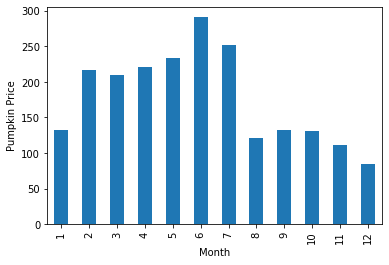

In [9]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")